In [41]:

import models
import utils
import data_processing
from constants import (
    VALUE_COLUMN,
    UNIT_RATE_COLUMN,
    QUANTITY_COLUMN,
    GROSS_WEIGHT_COLUMN,
    SHIP_COUNT_COLUMN,
    PORT_COUNT_COLUMN,
    FILL_METHOD,
    TARGET_COLUMN
)
import pandas as pd
import constants
import sys
from datetime import datetime
from build_data import get_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [42]:
COMMODITY = "magnesium"
SPIKES_WINDOW_SIZE = 20

VOLZA_FILE_PATH = f"../volza/{COMMODITY}/{COMMODITY}.csv"
PRICE_FILE_PATH = f"../volza/{COMMODITY}/{COMMODITY}_prices.csv"

In [43]:
WINDOW_SIZE = 40
data = get_data(VOLZA_FILE_PATH, PRICE_FILE_PATH, SPIKES_WINDOW_SIZE, center=False)

Building data...
Rows dropped due to NaN values: 1


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={"Value": "Brent Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={"Value": "WTI Oil Value"}, inplace=True)
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\analysis\build_data.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() inste

Detecting spikes... 20


c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\manim\LabV2\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [44]:
data.head(2)

,Date,Value,Std. Quantity (KG),Gross Weight,Std. Unit Rate ($/KG),ship_count,popular_port,popular_port_count,Price,Brent Oil Value,WTI Oil Value,ARIMA_Residuals,spikes
1,2020-01-02,112499.980000,50000.00,50080.0,2.250000,NaN,NaN,NaN,14150.0,67.05,61.17,14150.000000,0
2,2020-01-03,874407.619695,100172.26,25040.0,768.449153,NaN,NaN,NaN,14100.0,69.08,63.00,-1453.965633,0


In [45]:
data["spikes_new"] = utils.detect_spikes_new(data, "Price", window_size=WINDOW_SIZE, center=True)

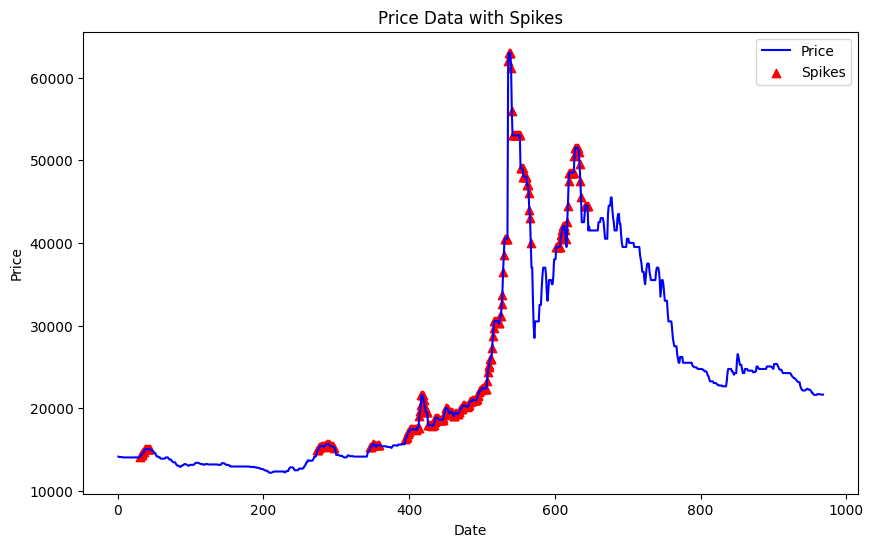

In [46]:
import matplotlib.pyplot as plt
# Plotting the price data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(data.index, data['Price'], label='Price', color='blue')

# Highlighting spikes
spike_indices = data[data['spikes_new'] == 1].index
spike_prices = data.loc[spike_indices, 'Price']
plt.scatter(spike_indices, spike_prices, color='red', marker='^', label='Spikes')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Data with Spikes')
plt.legend()

# Display the plot
# plt.show()


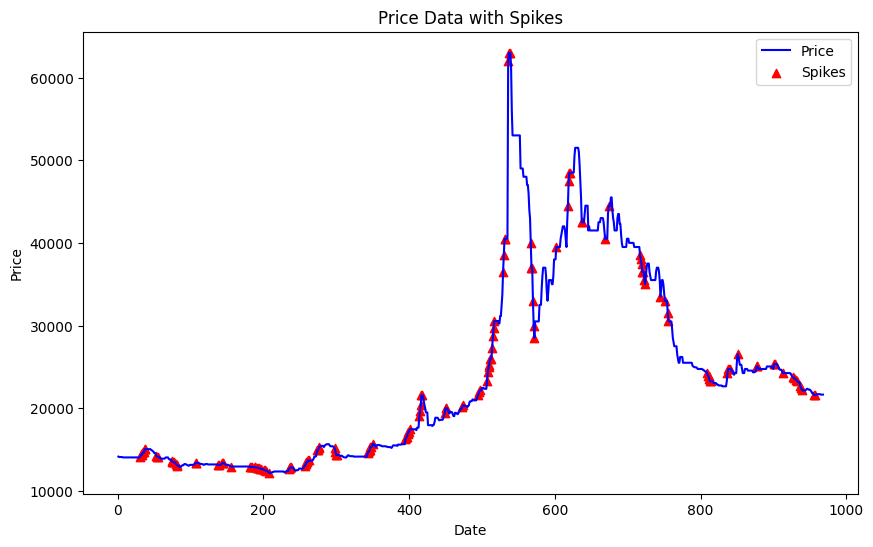

In [47]:
import matplotlib.pyplot as plt
# Plotting the price data
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(data.index, data['Price'], label='Price', color='blue')

# Highlighting spikes
spike_indices = data[data['spikes'] == 1].index
spike_prices = data.loc[spike_indices, 'Price']
plt.scatter(spike_indices, spike_prices, color='red', marker='^', label='Spikes')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Data with Spikes')
plt.legend()

# Display the plot
# plt.show()


In [48]:
# Calculate the percentage of spikes
total_spikes = len(spike_indices)
total_data_points = len(data)
spike_percentage = (total_spikes / total_data_points) * 100

# Print or display the spike percentage
print(f"Spike Percentage: {spike_percentage:.2f}%")

Spike Percentage: 15.81%
